# Cross-Validation and Bias-Variance: A Simple Guide
This notebook provides a concise, beginner-friendly introduction to two essential concepts in machine learning: **cross-validation** and the **bias-variance tradeoff**.

## 1. What is Cross-Validation?
Cross-validation is a robust technique to evaluate how well a machine learning model generalizes to new, unseen data. Instead of relying on a single train-test split (which can give misleading results depending on how the data is divided), cross-validation splits the data into several parts (called "folds"). The model is trained on some folds and tested on the remaining fold, repeating this process so every part of the data is used for both training and testing.

### Why is this important?
- **Reduces luck**: A single split might be unusually easy or hard for the model. Cross-validation averages over many splits, giving a more reliable estimate.
- **Uses all data**: Every data point is used for both training and testing, maximizing the value of your dataset.
- **Helps spot overfitting**: If your model performs well on some splits but poorly on others, it may be overfitting.

### Visual Example: K-Fold Cross-Validation

Below is a diagram showing how 5-fold cross-validation works:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/new_cross-val-graphic.png' width="600">

- The data is split into 5 equal parts (folds).
- The model is trained on 4 folds and tested on the remaining fold.
- This process repeats 5 times, each time with a different fold as the test set.
- The final performance is the average of the 5 test results.

This approach gives a much more stable and trustworthy estimate of model performance than a single train-test split.

In [1]:
# Simple cross-validation example with synthetic data
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Generate simple regression data
X, y = make_regression(n_samples=50, n_features=1, noise=10, random_state=42)

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE scores:", -scores)
print("Average MSE:", -np.mean(scores))

Cross-validated MSE scores: [114.65817618  62.40431021 190.48927362  24.05771069 139.60430828]
Average MSE: 106.24275579581186


**Explanation:**
- We split the data into 5 folds.
- The model is trained and tested 5 times, each time using a different fold as the test set.
- The average score gives a better estimate of how the model will perform on new data.

## 2. The Bias-Variance Tradeoff
When building models, we want them to be accurate on new, unseen data. Two sources of error can affect this:
- **Bias**: Error from overly simple models (underfitting).
- **Variance**: Error from overly complex models (overfitting).

The goal is to find a balance between bias and variance for the best generalization.

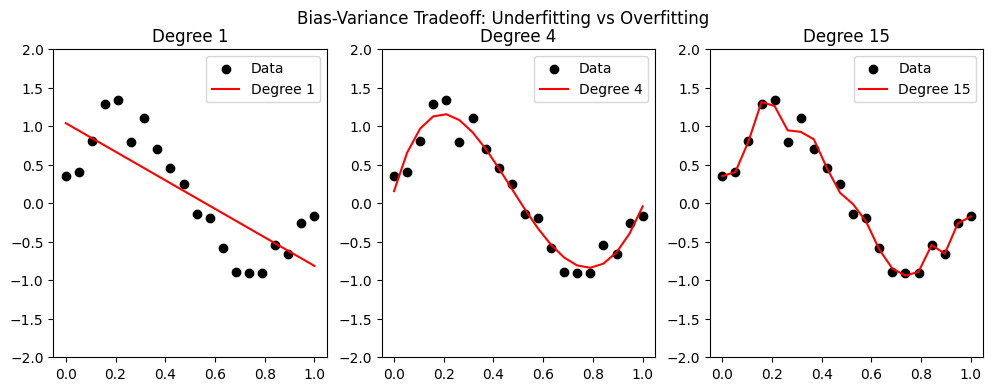

In [2]:
# Visualizing bias and variance with polynomial regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(0)
X = np.linspace(0, 1, 20)[:, None]
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, 0.2, X.shape[0])

plt.figure(figsize=(12, 4))
for i, degree in enumerate([1, 4, 15]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.ylim(-2, 2)
    plt.legend()
plt.suptitle('Bias-Variance Tradeoff: Underfitting vs Overfitting')
plt.show()

**Explanation:**
- **Degree 1**: High bias, low variance (underfits the data).
- **Degree 15**: Low bias, high variance (overfits the data).
- **Degree 4**: Good balance (captures the pattern without fitting noise).

### COMPARING BETWEEN TRAIN-TEST 

#### 1. UNDERFITTING
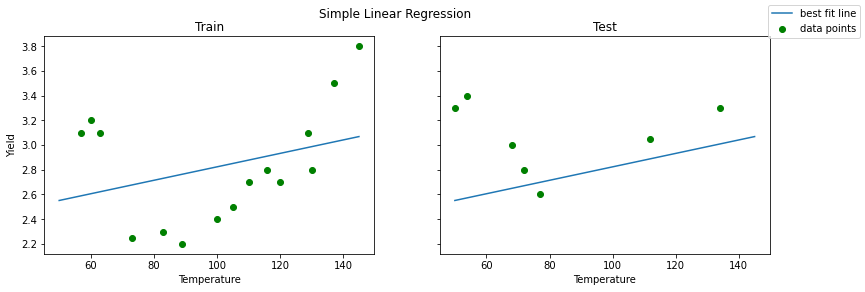

#### 2. OVERFITTING

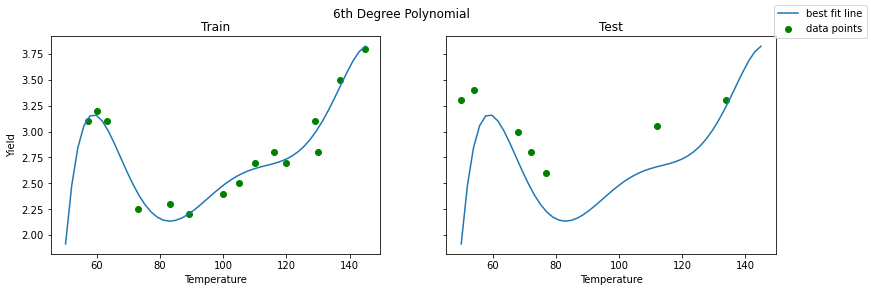

## 3. Summary Table
| Model Complexity | Bias | Variance | Generalization |
|------------------|------|----------|---------------|
| Low              | High | Low      | Poor (underfit)|
| High             | Low  | High     | Poor (overfit) |
| Moderate         | Low  | Low      | Good           |

## 4. Key Takeaways
- **Cross-validation** helps us estimate model performance more reliably.
- The **bias-variance tradeoff** is about finding the right model complexity.
- Use simple visualizations and cross-validation to guide your model choices.